# PROJETO 7

## Time series filtering

In [1]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.fftpack

In [2]:
srate = 1000
time  = np.arange(0,10*srate)/srate
npnts = len(time)

data = np.random.randn(npnts)*5

# add 50 Hz "line noise"
linenoise = np.sin(2*np.pi*50*time)
data += linenoise

# spectral stuff
hz = np.linspace(0,srate/2,int(npnts/2)+1)


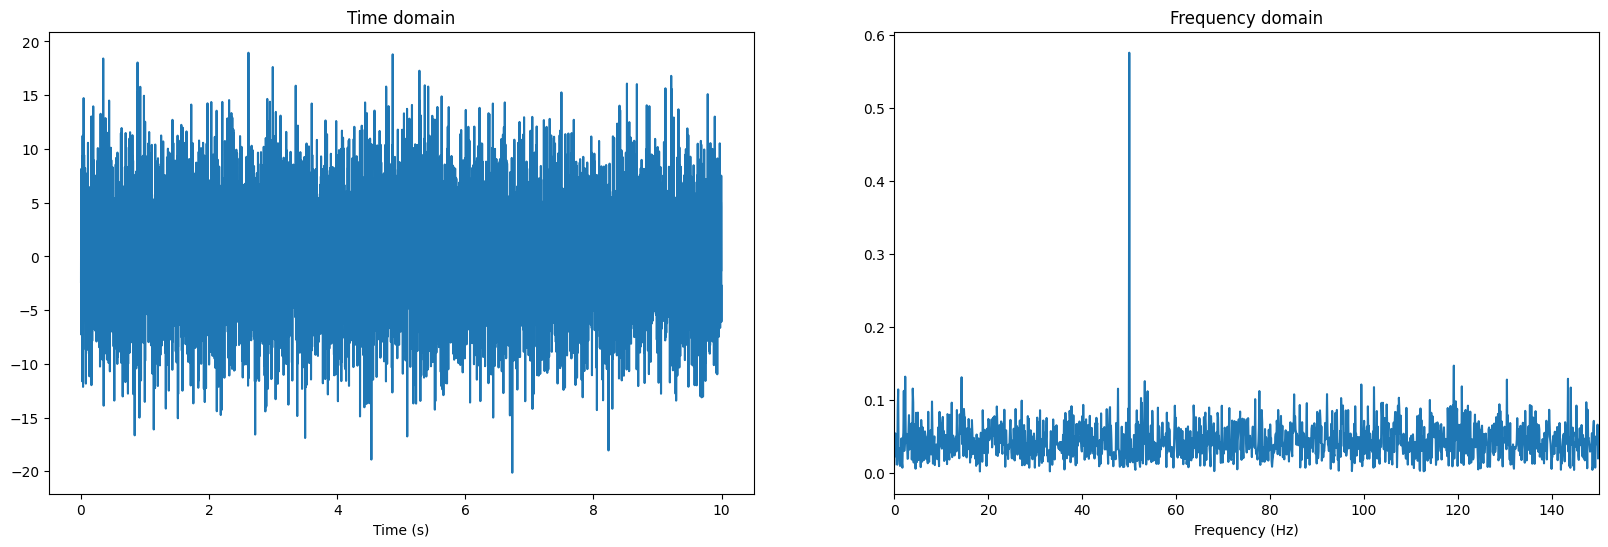

In [3]:
def plotSignal(data):
  fig,ax = plt.subplots(1,2,figsize=(20,6))
  ax[0].plot(time,data)
  ax[0].set_xlabel('Time (s)')
  ax[0].set_title('Time domain')

  dataX = scipy.fftpack.fft(data/npnts)
  ax[1].plot(hz,np.abs(dataX[:len(hz)]))
  ax[1].set_xlim([0,150])
  ax[1].set_xlabel('Frequency (Hz)')
  ax[1].set_title('Frequency domain')


plotSignal(data)

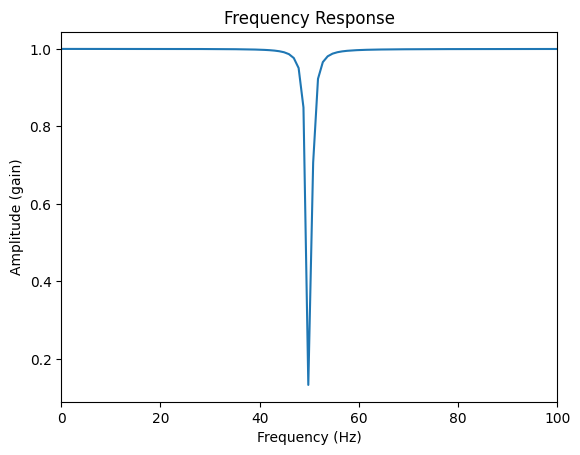

In [4]:
f0 = 50  # Frequency to be removed from signal (Hz)
Q = 50  # Quality factor
# Design notch filter
b,a = signal.iirnotch(f0,Q,srate)

# evaluate the filter kernel
freq,h = signal.freqz(b,a,fs=srate)
plt.plot(freq,abs(h)**2)
plt.title("Frequency Response")
plt.ylabel("Amplitude (gain)")
plt.xlabel('Frequency (Hz)')
plt.xlim([0, 100])
plt.show()

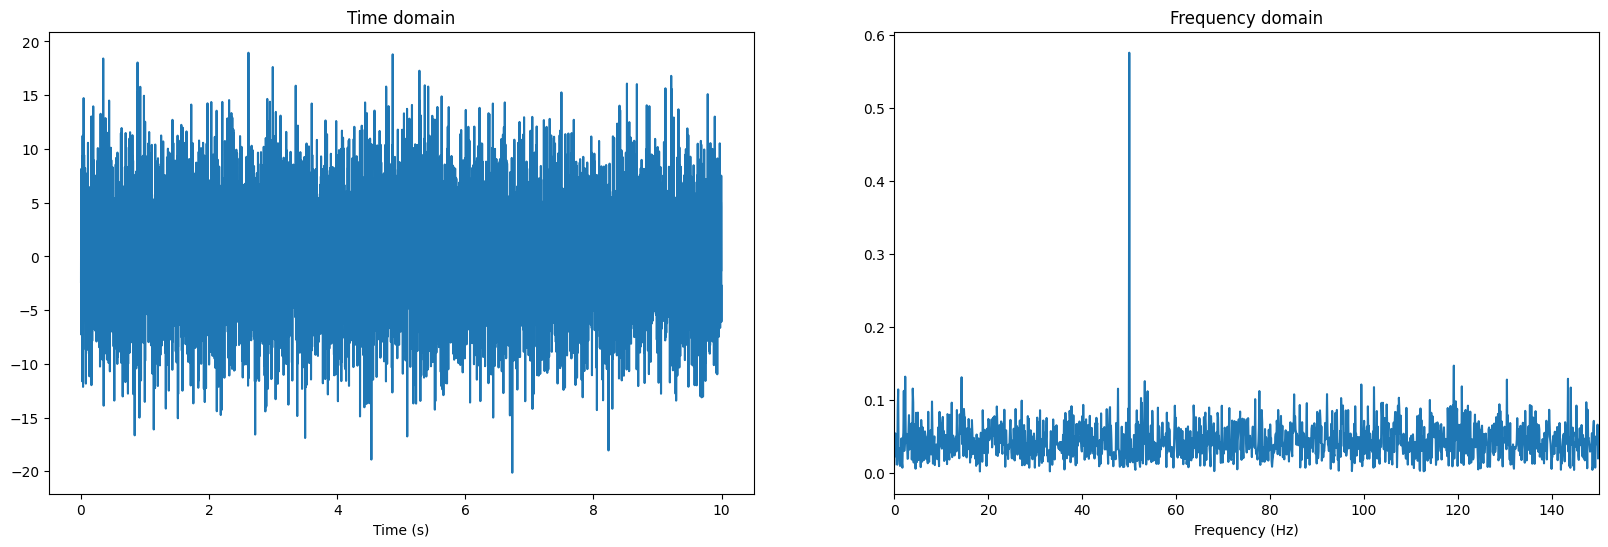

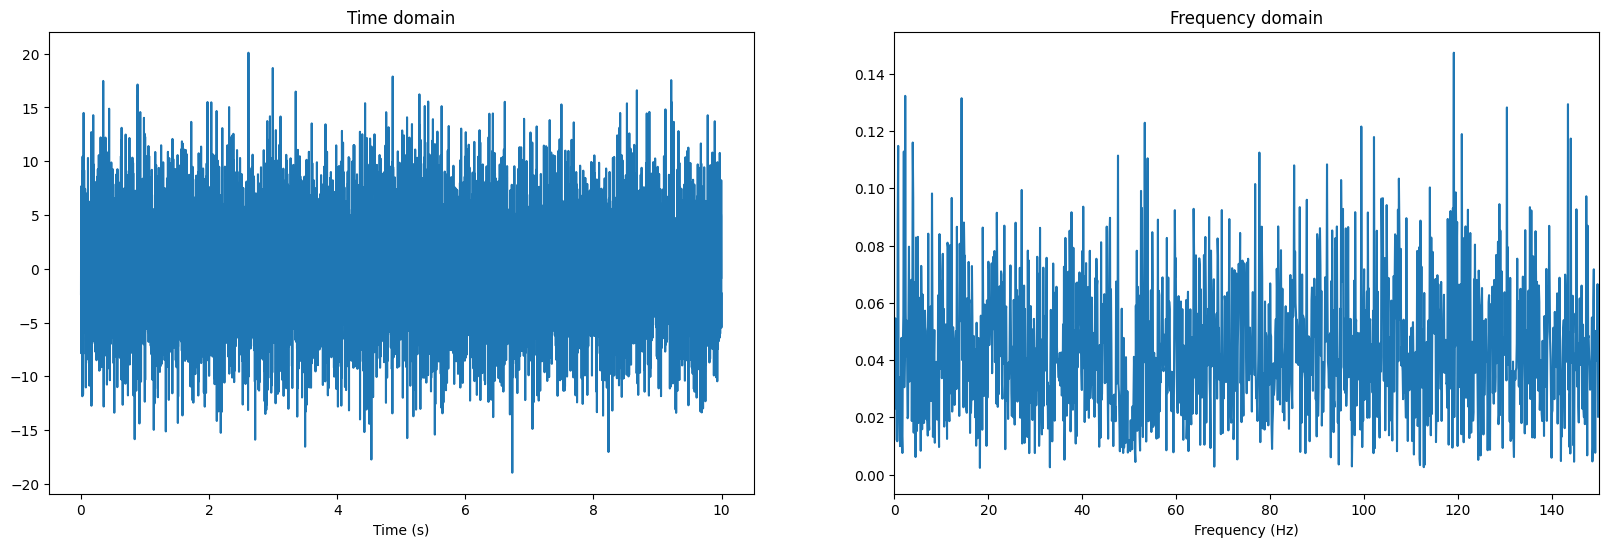

In [5]:
# apply the filter and inspect
notched = signal.filtfilt(b,a,data)

plotSignal(data)
plotSignal(notched)

In [6]:
## create a function to plot two signals on top of each other

def plot2Signals(data1,data2):
  # create a figure
  fig,ax = plt.subplots(1,2,figsize=(15,4))

  # plot the time-domain
  ax[0].plot(time,data1,label='Original')
  ax[0].plot(time,data2,label='Filtered')
  ax[0].set_xlabel('Time (s)')
  ax[0].legend()
  ax[0].set_xlim([1,1.2])
  ax[0].set_title('Time domain')

  # plot the frequency-domain signal
  data1X = np.abs( scipy.fftpack.fft(data1/npnts) )
  data2X = np.abs( scipy.fftpack.fft(data2/npnts) )
  hz = np.linspace(0,srate/2,int(npnts/2)+1)
  ax[1].plot(hz,data1X[:len(hz)],label='Original')
  ax[1].plot(hz,data2X[:len(hz)],label='Filtered')
  ax[1].set_xlim([0,150])
  ax[1].legend()
  ax[1].set_xlabel('Frequency (Hz)')
  ax[1].set_title('Frequency domain')

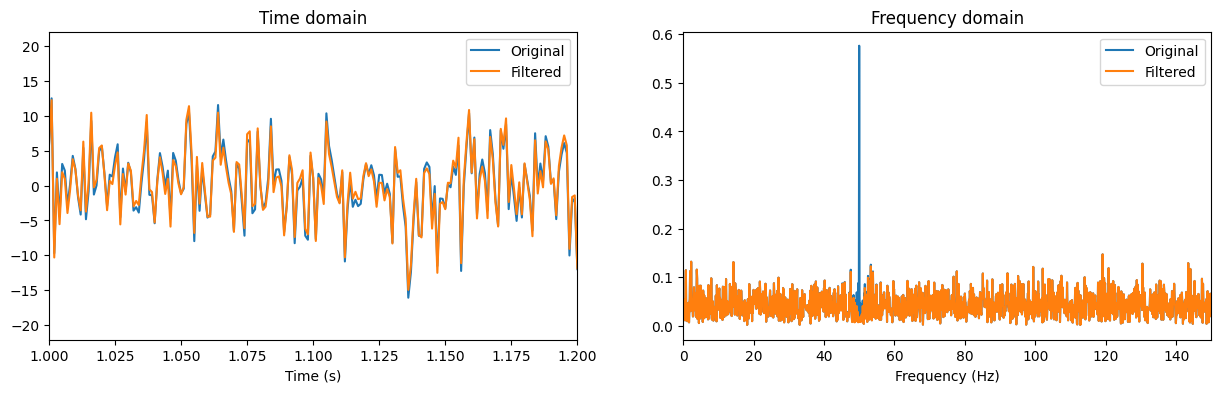

In [7]:
# now run that plotting function
plot2Signals(data,notched)

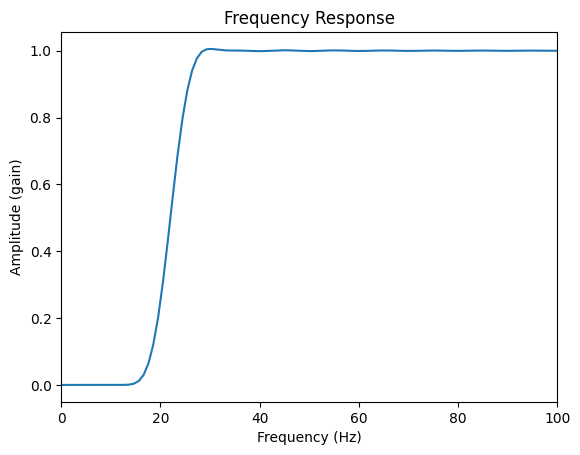

In [8]:
lowedge = 20 # Hz
fkern = signal.firwin(lowedge*10+1,lowedge/(srate/2),pass_zero=False)

# evaluate the filter kernel
freq,h = signal.freqz(fkern,1,fs=srate)
plt.plot(freq,abs(h)**2)
plt.title("Frequency Response")
plt.ylabel("Amplitude (gain)")
plt.xlabel('Frequency (Hz)')
plt.xlim([0, 100])
plt.show()

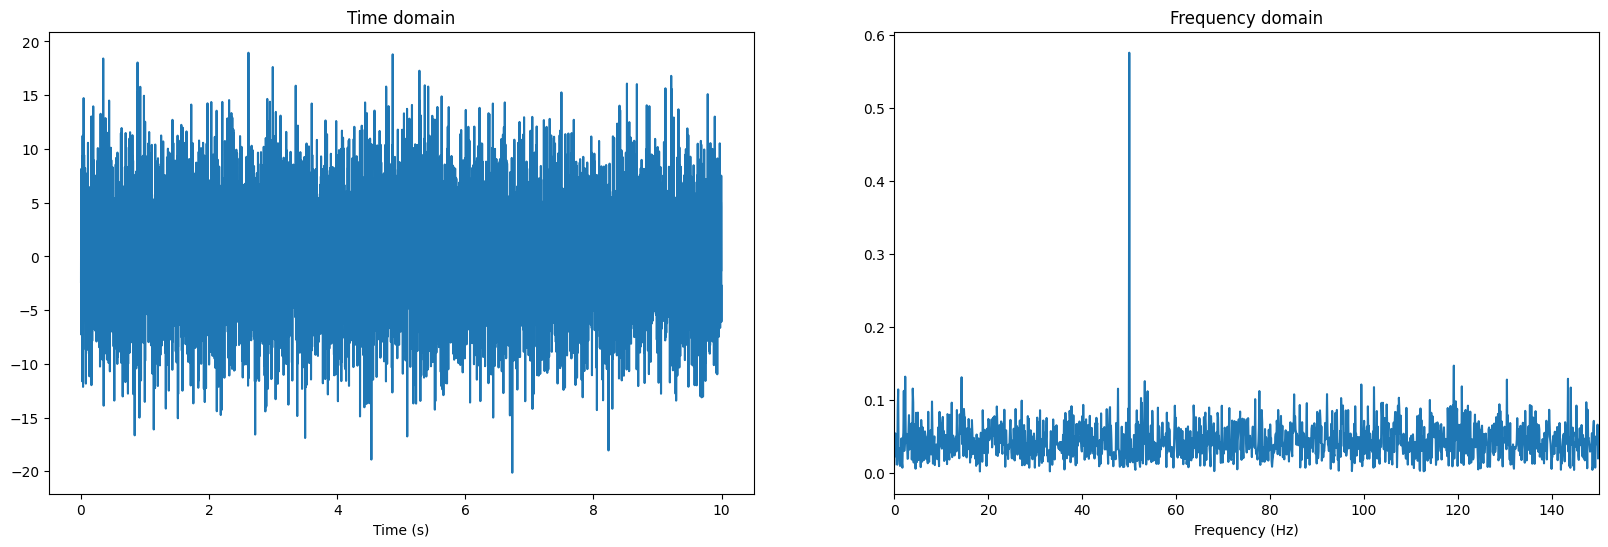

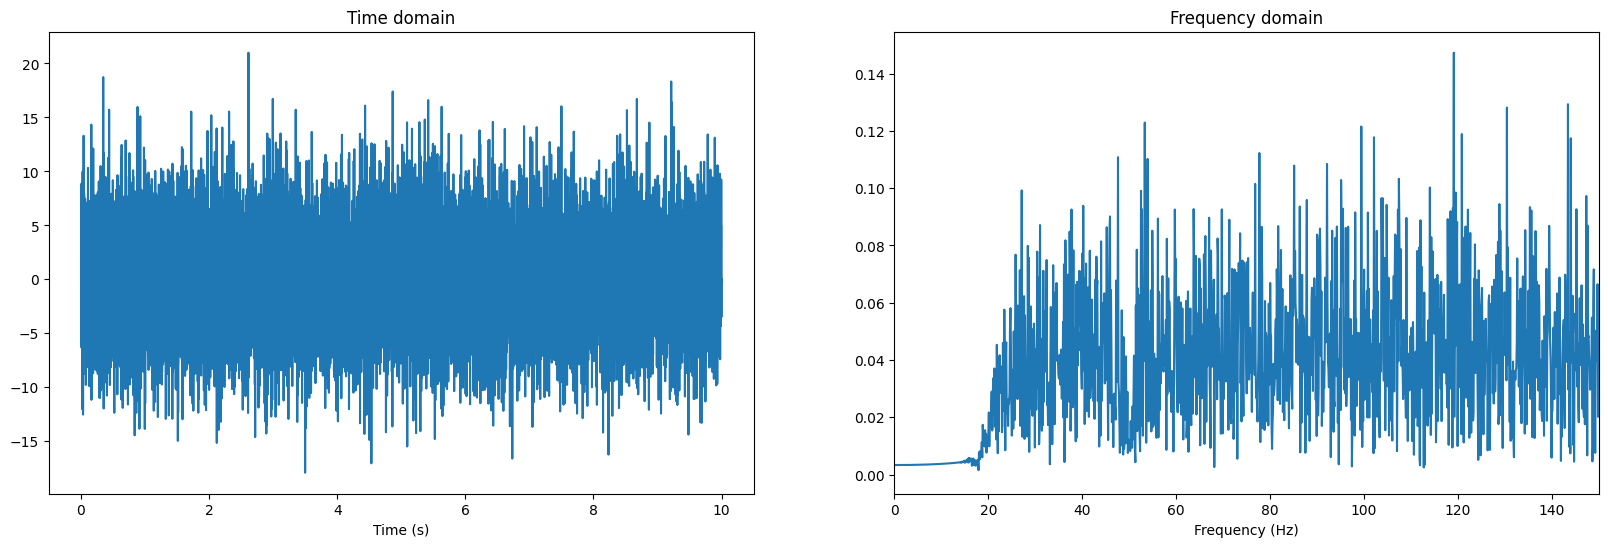

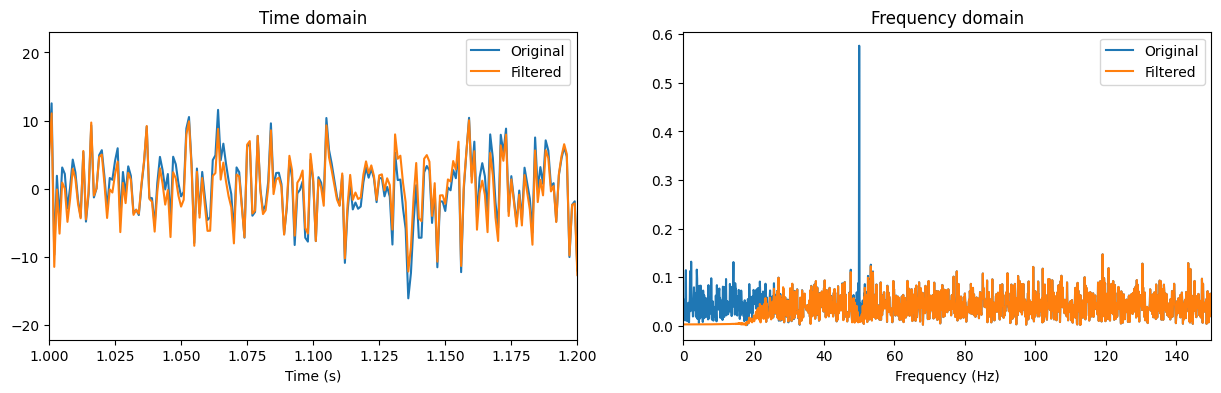

In [9]:
# apply the filter and plot
highpass = signal.filtfilt(fkern,1,notched)

plotSignal(data)
plotSignal(highpass)
plot2Signals(data,highpass)

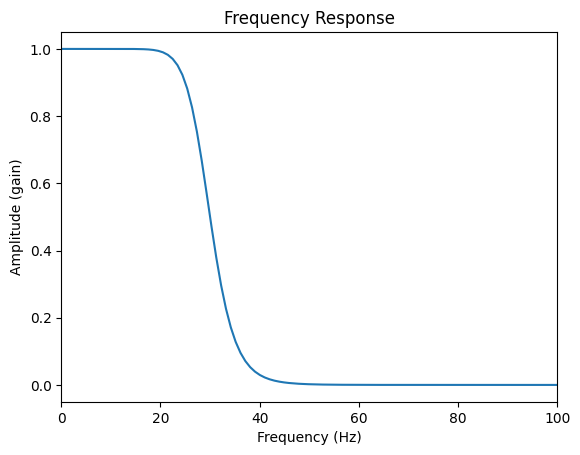

In [10]:
lowcutoff = 30

# create filter coefficients
b,a = signal.butter(6,lowcutoff/(srate/2),btype='lowpass')

# evaluate the filter kernel
freq,h = signal.freqz(b,a,fs=srate)
plt.plot(freq,abs(h)**2)
plt.title("Frequency Response")
plt.ylabel("Amplitude (gain)")
plt.xlabel('Frequency (Hz)')
plt.xlim([0,100])
plt.show()


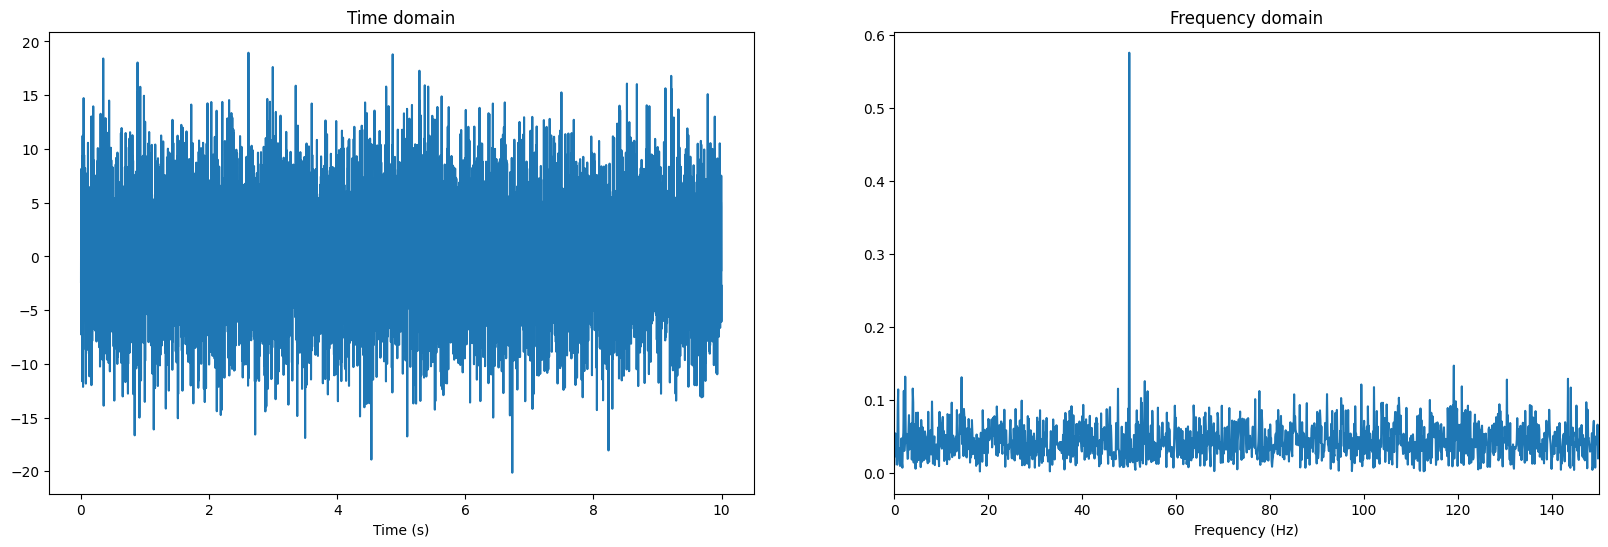

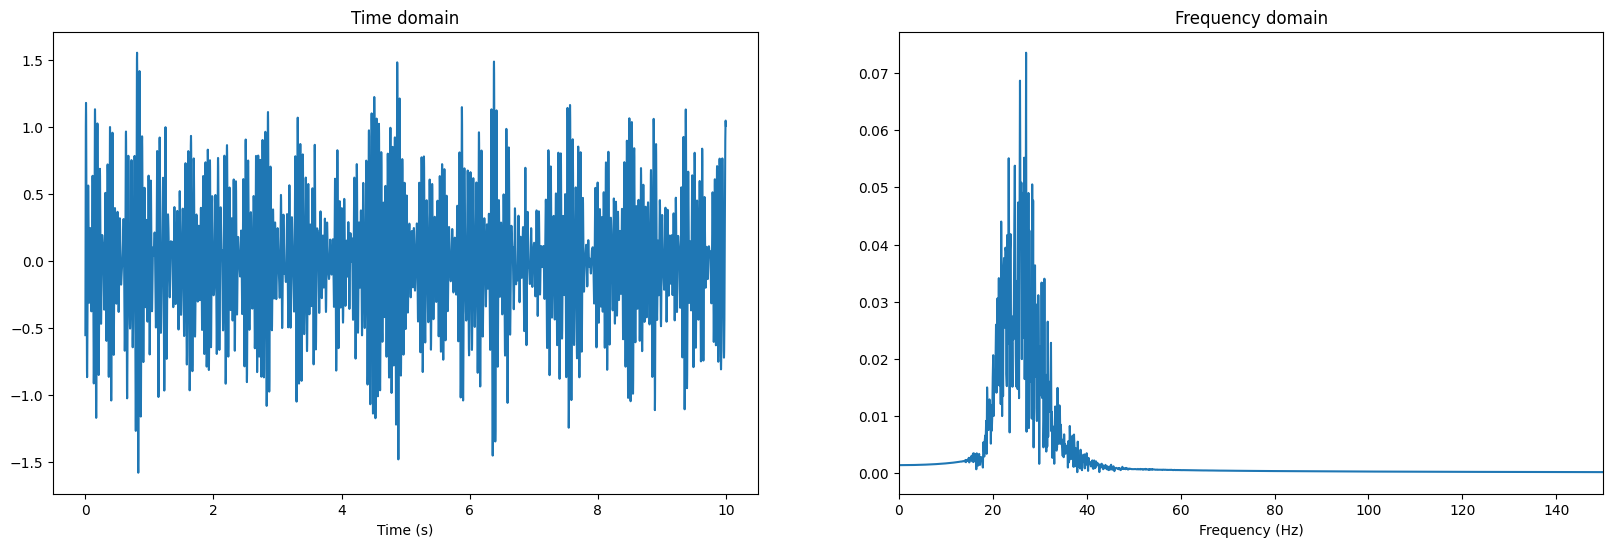

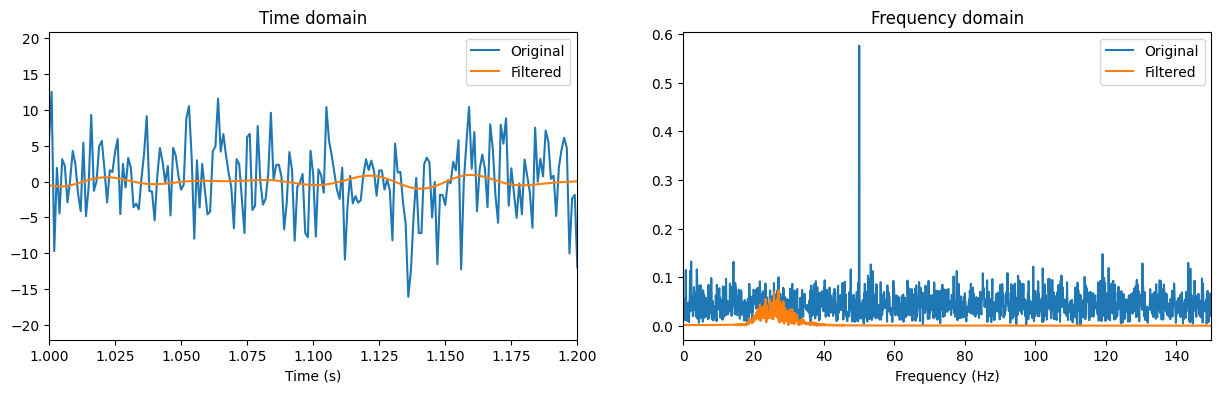

In [11]:
bandpass = signal.filtfilt(b,a,highpass)

plotSignal(data)
plotSignal(bandpass)
plot2Signals(data,bandpass)